In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score, silhouette_score

path_file = "/content/CC GENERAL.csv"
df = pd.read_csv(path_file)

print("=== LANGKAH 1: PROFILE DATASET ===")
print("Saya telah berhasil memuat data CC GENERAL.csv")
print("Berikut adalah informasi dasar dataset yang saya gunakan:")
print("-------------------------------------------------------")
df.info()

print("-------------------------------------------------------")
print("Contoh 5 baris data teratas:")
display(df.head())
print("Keterangan: Output di atas akan saya screenshot untuk Laporan Bab 2 (Profile Dataset).")

=== LANGKAH 1: PROFILE DATASET ===
Saya telah berhasil memuat data CC GENERAL.csv
Berikut adalah informasi dasar dataset yang saya gunakan:
-------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9  

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


Keterangan: Output di atas akan saya screenshot untuk Laporan Bab 2 (Profile Dataset).


In [11]:
print("=== LANGKAH 2: DATA PREPROCESSING ===")

# 1. Hapus Kolom ID
if 'CUST_ID' in df.columns:
    df = df.drop('CUST_ID', axis=1)
    print("1. Saya menghapus kolom CUST_ID karena hanya berisi identitas dan tidak relevan untuk pola clustering.")

# 2. Isi Data Kosong
df.fillna(df.mean(), inplace=True)
print("2. Saya mengisi data yang kosong (missing values) dengan nilai rata-rata (Mean Imputation) agar data lengkap.")

# 3. Scaling (Standarisasi)
scaler = StandardScaler()
df_scaled_array = scaler.fit_transform(df)
df_scaled = pd.DataFrame(df_scaled_array, columns=df.columns)
print("3. Saya melakukan standarisasi data (Scaling) agar rentang angka antar fitur menjadi setara.")

print("\n-------------------------------------------------------")
print("Berikut adalah contoh data setelah saya bersihkan dan lakukan scaling:")
display(df_scaled.head())


=== LANGKAH 2: DATA PREPROCESSING ===
2. Saya mengisi data yang kosong (missing values) dengan nilai rata-rata (Mean Imputation) agar data lengkap.
3. Saya melakukan standarisasi data (Scaling) agar rentang angka antar fitur menjadi setara.

-------------------------------------------------------
Berikut adalah contoh data setelah saya bersihkan dan lakukan scaling:


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.731989,-0.249434,-0.424900,-0.356934,-0.349079,-0.466786,-0.806490,-0.678661,-0.707313,-0.675349,-0.476070,-0.511333,-0.960433,-0.528979,-3.109675e-01,-0.525551,0.36068
1,0.786961,0.134325,-0.469552,-0.356934,-0.454576,2.605605,-1.221758,-0.678661,-0.916995,0.573963,0.110074,-0.591796,0.688639,0.818642,8.931021e-02,0.234227,0.36068
2,0.447135,0.518084,-0.107668,0.108889,-0.454576,-0.466786,1.269843,2.673451,-0.916995,-0.675349,-0.476070,-0.109020,0.826062,-0.383805,-1.016632e-01,-0.525551,0.36068
3,0.049099,-1.016953,0.232058,0.546189,-0.454576,-0.368653,-1.014125,-0.399319,-0.916995,-0.258913,-0.329534,-0.551565,0.826062,-0.598688,4.878305e-17,-0.525551,0.36068
4,-0.358775,0.518084,-0.462063,-0.347294,-0.454576,-0.466786,-1.014125,-0.399319,-0.916995,-0.675349,-0.476070,-0.551565,-0.905464,-0.364368,-2.657913e-01,-0.525551,0.36068


=== LANGKAH 3: EXPLORATORY DATA ANALYSIS (EDA) ===
Saya membuat Heatmap untuk melihat hubungan (korelasi) antar kolom.
Jika warnanya merah pekat, berarti hubungannya kuat.

-------------------------------------------------------


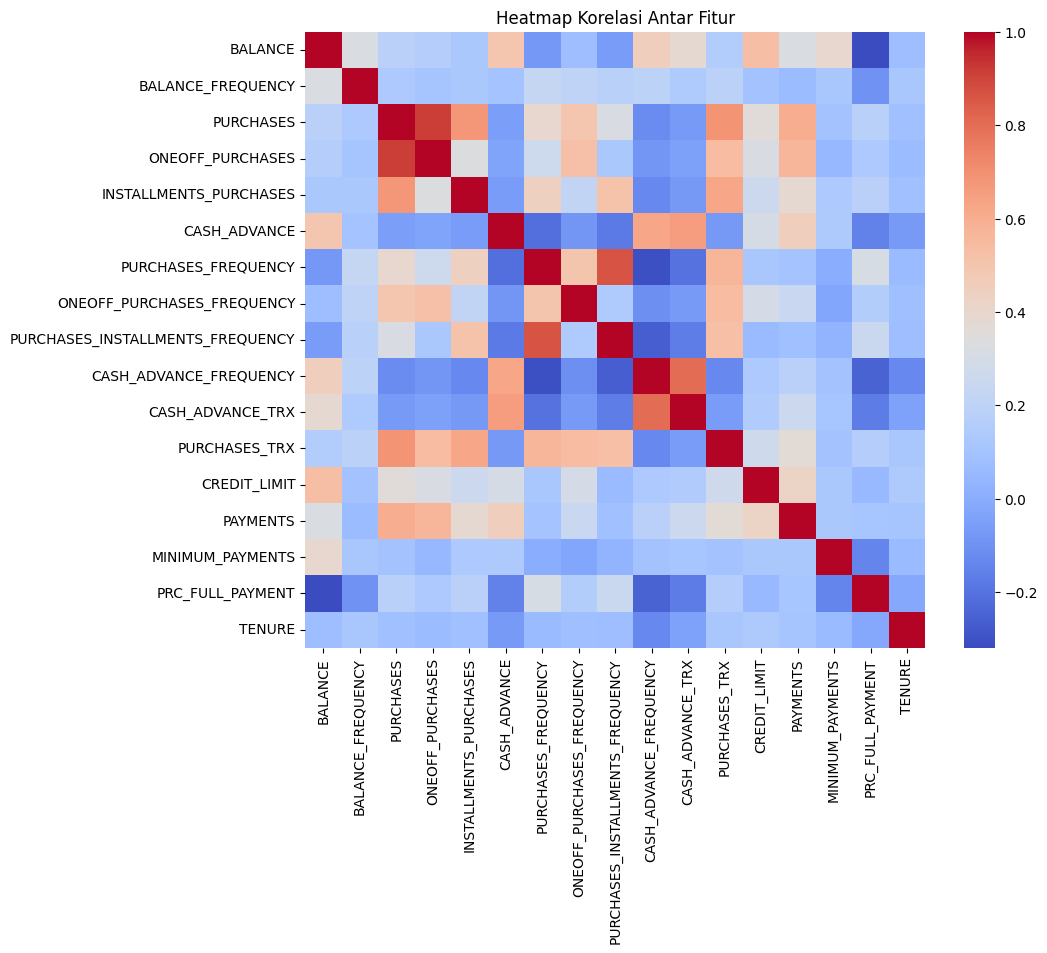


Keterangan: Grafik Heatmap di atas akan saya screenshot untuk Laporan Bab 4 (EDA).


In [12]:
print("=== LANGKAH 3: EXPLORATORY DATA ANALYSIS (EDA) ===")
print("Saya membuat Heatmap untuk melihat hubungan (korelasi) antar kolom.")
print("Jika warnanya merah pekat, berarti hubungannya kuat.")
print("\n-------------------------------------------------------")

# Mengatur ukuran gambar agar jelas
plt.figure(figsize=(10, 8))

# Membuat heatmap korelasi
sns.heatmap(df.corr(), cmap='coolwarm', annot=False)

# Memberi judul grafik
plt.title("Heatmap Korelasi Antar Fitur")

# Menampilkan grafik
plt.show()

print("\nKeterangan: Grafik Heatmap di atas akan saya screenshot untuk Laporan Bab 4 (EDA).")

In [17]:
print("=== LANGKAH 4: SELEKSI FITUR (PCA) ===")
print("Saya menggunakan metode PCA untuk meringkas 17 kolom data menjadi 2 kolom utama.")
print("Tujuannya agar data dapat divisualisasikan dalam grafik 2 Dimensi (Sumbu X dan Y).")
print("\n-------------------------------------------------------")

pca = PCA(n_components=2)
pca_hasil = pca.fit_transform(df_scaled)

df_pca = pd.DataFrame(data=pca_hasil, columns=['PCA1', 'PCA2'])

print("Berikut adalah 5 baris data pertama setelah saya ringkas menjadi 2 dimensi:")
display(df_pca.head())

print("\nKeterangan: Tabel PCA di atas akan saya screenshot untuk Laporan Bab 5 (Seleksi Fitur).")

=== LANGKAH 4: SELEKSI FITUR (PCA) ===
Saya menggunakan metode PCA untuk meringkas 17 kolom data menjadi 2 kolom utama.
Tujuannya agar data dapat divisualisasikan dalam grafik 2 Dimensi (Sumbu X dan Y).

-------------------------------------------------------
Berikut adalah 5 baris data pertama setelah saya ringkas menjadi 2 dimensi:


,PCA1,PCA2
0,-1.682220,-1.076451
1,-1.138295,2.506477
2,0.969684,-0.383520
3,-0.873628,0.043166
4,-1.599434,-0.688581



Keterangan: Tabel PCA di atas akan saya screenshot untuk Laporan Bab 5 (Seleksi Fitur).


=== LANGKAH 5: MODELING (K-MEANS) ===
Saya mencari jumlah cluster paling optimal menggunakan Metode Elbow.
Saya menguji jumlah cluster dari 1 sampai 10.

-------------------------------------------------------


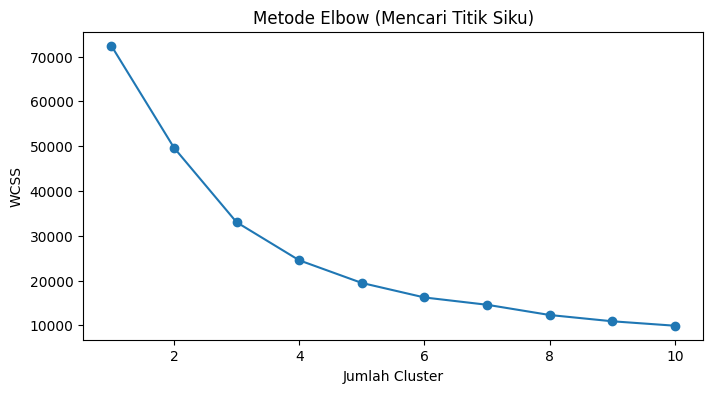


Berdasarkan grafik di atas, sikunya terlihat melandai di k=4.
Maka, saya memutuskan untuk membagi nasabah menjadi 4 cluster.

Berikut adalah visualisasi hasil clustering saya:


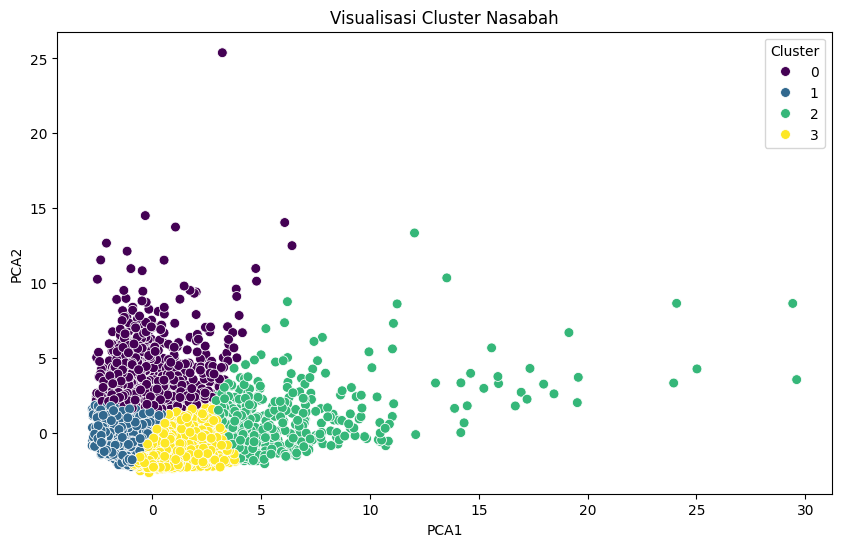


Keterangan: Dua grafik di atas (Elbow & Scatter Plot) akan saya screenshot untuk Laporan Bab 6.


In [14]:
print("=== LANGKAH 5: MODELING (K-MEANS) ===")
print("Saya mencari jumlah cluster paling optimal menggunakan Metode Elbow.")
print("Saya menguji jumlah cluster dari 1 sampai 10.")
print("\n-------------------------------------------------------")

# 1. Mencari nilai WCSS untuk Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(df_pca)
    wcss.append(kmeans.inertia_)

# 2. Menampilkan Grafik Elbow
plt.figure(figsize=(8,4))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Metode Elbow (Mencari Titik Siku)')
plt.xlabel('Jumlah Cluster')
plt.ylabel('WCSS')
plt.show()

print("\nBerdasarkan grafik di atas, sikunya terlihat melandai di k=4.")
print("Maka, saya memutuskan untuk membagi nasabah menjadi 4 cluster.")

# 3. Menjalankan K-Means dengan k=4
kmeans_final = KMeans(n_clusters=4, init='k-means++', random_state=42)
cluster_labels = kmeans_final.fit_predict(df_pca)

# Menyimpan hasil label ke dataframe
df_pca['Cluster'] = cluster_labels

# 4. Visualisasi Hasil Cluster
print("\nBerikut adalah visualisasi hasil clustering saya:")
plt.figure(figsize=(10,6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=df_pca, palette='viridis', s=50)
plt.title('Visualisasi Cluster Nasabah')
plt.show()

print("\nKeterangan: Dua grafik di atas (Elbow & Scatter Plot) akan saya screenshot untuk Laporan Bab 6.")

In [15]:
import joblib

print("=== LANGKAH 6: EVALUASI DAN PENYIMPANAN MODEL ===")
print("Saya menghitung kualitas cluster menggunakan dua metrik: DBI dan Silhouette Score.")
print("\n-------------------------------------------------------")

# 1. Menghitung Davies-Bouldin Index
dbi = davies_bouldin_score(df_pca[['PCA1', 'PCA2']], cluster_labels)
print(f"Nilai Davies-Bouldin Index (DBI) saya: {dbi:.4f}")
print("(Semakin kecil nilai DBI, semakin baik pemisahan antar cluster).")

# 2. Menghitung Silhouette Score
sil = silhouette_score(df_pca[['PCA1', 'PCA2']], cluster_labels)
print(f"Nilai Silhouette Score saya: {sil:.4f}")
print("(Semakin mendekati 1, semakin baik kualitas clusternya).")

print("\n-------------------------------------------------------")
print("Keterangan: Dua angka di atas (DBI & Silhouette) akan saya catat untuk Laporan Bab 7.")

# 3. Menyimpan Model
joblib.dump(kmeans_final, 'model_kmeans_uas.pkl')
print("\n=== PENYIMPANAN BERHASIL ===")
print("Saya telah menyimpan model K-Means ke dalam file bernama 'model_kmeans_uas.pkl'.")

=== LANGKAH 6: EVALUASI DAN PENYIMPANAN MODEL ===
Saya menghitung kualitas cluster menggunakan dua metrik: DBI dan Silhouette Score.

-------------------------------------------------------
Nilai Davies-Bouldin Index (DBI) saya: 0.8007
(Semakin kecil nilai DBI, semakin baik pemisahan antar cluster).
Nilai Silhouette Score saya: 0.4077
(Semakin mendekati 1, semakin baik kualitas clusternya).

-------------------------------------------------------
Keterangan: Dua angka di atas (DBI & Silhouette) akan saya catat untuk Laporan Bab 7.

=== PENYIMPANAN BERHASIL ===
Saya telah menyimpan model K-Means ke dalam file bernama 'model_kmeans_uas.pkl'.


In [16]:
print("=== LANGKAH 7: ANALISA KARAKTERISTIK CLUSTER ===")
print("Saya menggabungkan label cluster ke data asli untuk melihat perilaku nasabah di setiap kelompok.")
print("Saya menghitung nilai rata-rata (mean) dari setiap fitur berdasarkan clusternya.")
print("\n-------------------------------------------------------")

# 1. Masukkan label cluster ke data frame awal (df)
# (df ini adalah data yang sudah di-fillna tapi belum di-scaling, jadi angkanya masih asli/dolar)
df['Cluster'] = cluster_labels

# 2. Hitung rata-rata tiap fitur per cluster
# Saya pilih kolom-kolom utama saja biar tabelnya tidak kepanjangan
kolom_utama = ['BALANCE', 'PURCHASES', 'CREDIT_LIMIT', 'PAYMENTS', 'TENURE']
profil_cluster = df.groupby('Cluster')[kolom_utama].mean()

print("Berikut adalah rata-rata perilaku nasabah di setiap cluster:")
display(profil_cluster)

print("\nKeterangan:")
print("- BALANCE: Rata-rata saldo (utang) yang dimiliki.")
print("- PURCHASES: Rata-rata total belanja.")
print("- CREDIT_LIMIT: Rata-rata limit kartu kredit.")
print("- PAYMENTS: Rata-rata pembayaran tagihan.")
print("\nTabel ini akan saya screenshot untuk Laporan Bab 8 (Analisa).")

=== LANGKAH 7: ANALISA KARAKTERISTIK CLUSTER ===
Saya menggabungkan label cluster ke data asli untuk melihat perilaku nasabah di setiap kelompok.
Saya menghitung nilai rata-rata (mean) dari setiap fitur berdasarkan clusternya.

-------------------------------------------------------
Berikut adalah rata-rata perilaku nasabah di setiap cluster:


,BALANCE,PURCHASES,CREDIT_LIMIT,PAYMENTS,TENURE
Cluster,,,,,
0,4508.592174,462.914437,7456.595294,3545.166835,11.438907
1,1014.708276,222.981330,3111.229654,856.205918,11.364216
2,3401.840056,6894.613917,9541.650099,6723.271522,11.960239
3,823.929519,1236.281903,4249.640868,1328.776125,11.661796



Keterangan:
- BALANCE: Rata-rata saldo (utang) yang dimiliki.
- PURCHASES: Rata-rata total belanja.
- CREDIT_LIMIT: Rata-rata limit kartu kredit.
- PAYMENTS: Rata-rata pembayaran tagihan.

Tabel ini akan saya screenshot untuk Laporan Bab 8 (Analisa).
